<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
**Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


In [ ]:
#pip install skimpy --user

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# PART- 1 `( Data Cleaning )`





In [ ]:
df=pd.read_json("../OneDrive/Masaüstü/scout_car.json",lines=True)

In [ ]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [ ]:
# First Method to convert all columns to same format. 

# from skimpy import clean_columns    

# df1 = clean_columns(df)
# df1.head(3)


In [ ]:
df.rename(columns={"\nComfort & Convenience\n": "Comfort_Convenience",
                   "\nEntertainment & Media\n":"Entertainment_Media",
                   "\nExtras\n":"Extras",
                   "\nSafety & Security\n":"Safety_Security"}, inplace=True)

df.head(3)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [ ]:
#percentage of nan values in all columns
df.isnull().sum()*100/df.shape[0] 

url                               0.00
make_model                        0.00
short_description                 0.29
body_type                         0.38
price                             0.00
vat                              28.35
km                                0.00
registration                      0.00
prev_owner                       42.89
kW                              100.00
hp                                0.00
Type                              0.01
Previous Owners                  41.71
Next Inspection                  77.79
Inspection new                   75.30
Warranty                         34.05
Full Service                     48.39
Non-smoking Vehicle              54.92
null                              0.00
Make                              0.00
Model                             0.00
Offer Number                     19.94
First Registration               10.03
Body Color                        3.75
Paint Type                       36.26
Body Color Original      

## Droping columns that have missing values more than %90.

In [ ]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [ ]:
df_nans(df,90)

kW                              100.00
Electricity consumption          99.14
Last Service Date                96.44
Other Fuel Types                 94.47
Availability                     96.01
Last Timing Belt Service Date    99.90
Available from                   98.29
dtype: float64

In [ ]:
column_nans(df["Electricity consumption"])

99.13939317796344

In [ ]:
df_nans(df,90).index

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [ ]:
drop_col = df_nans(df,90).index
drop_col

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [ ]:
df.drop(drop_col,axis=1,inplace=True)

In [ ]:
df.drop("null",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next Inspection      3535 non-null   object
 13  Inspection new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full Service         8215 non-null   object
 16  Non-

## The examination and cleaning all the columns/features one by one

## url

A data analyst should primarily benefit from all incoming data s/he encounters; HOWEVER,Even if url contains some information, we do NOT need it since this information can be obtained from other features.

In [ ]:
df["url"].value_counts(dropna=False)   #unique value of each items are not used in model.

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [ ]:
df.drop("url",axis=1,inplace=True)

## make_model

In [ ]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## make

In [ ]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [ ]:
df['Make'] = df.Make.str.strip('\n')

In [ ]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

## Model

In [ ]:
df['Model'].value_counts(dropna=False)

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [ ]:
df['Model'][0]

['\n', 'A1', '\n']

In [ ]:
df['Model'][0][1]

'A1'

In [ ]:
df.Model.str[1]

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [ ]:
df['Model']=df.Model.str[1]

In [ ]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [ ]:
df.drop(['Make','Model'],axis=1,inplace=True)

**"make_model" column gives us a more detailed information for our analysis.After the examination of the following columns, "Make" & "Model" I have decided to drop them.**

## short_description

In [ ]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [ ]:
df.drop('short_description',axis=1,inplace=True)

## description

In [ ]:
df.description.astype(str).value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
df.drop("description", axis=1, inplace=True)

**Even if the columns of "short_description" & "description" contain detailed information, we do NOT need it since this information can be obtained from other features.**

## body_type

In [ ]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## Body

In [ ]:
df.Body.value_counts(dropna=False)

[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [ ]:
df.drop('Body',axis=1,inplace=True)

**Both the columns of "body_type" & "Body" have the same information, we will keep the "body_type" column which is more readable.**

## price (target column)   
 
**Target column is not manipulated by principle.**

In [ ]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [ ]:
df.price.isnull().sum()

0

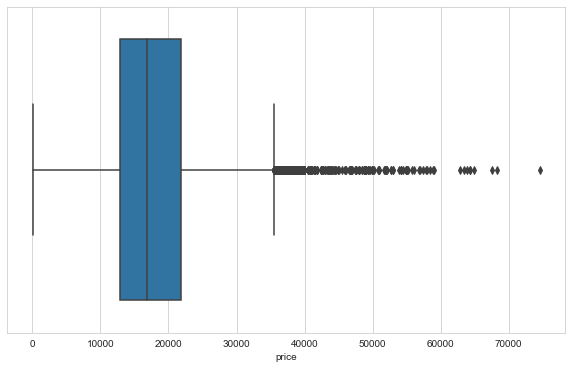

In [ ]:
sns.boxplot(df.price);

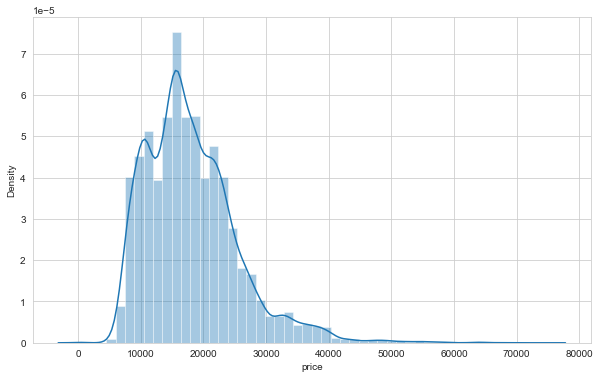

In [ ]:
sns.distplot(df.price);

## vat

The Value Added Tax, or VAT, in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [ ]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [ ]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [ ]:
#alternative
#df["km"]=df.km.str.replace(",","").str.rstrip("km").replace("-",np.nan).astype(float)

In [ ]:
df["km"] = df.km.str.replace(',','').str.extract('(\d{1,8})')[0].astype('float')  
#Function of extract returns a dataframe, that's why we have to use slicing method before changing the type of column
#astype(float) is needed here,because there are nan values, column is not be converted to numeric type.Being float is one way of nan&numeric column.
#str.(extract('(\d+)')

In [ ]:
df.km.value_counts(dropna=False)

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6690, dtype: int64

In [ ]:
df.km.isnull().sum()

1024

## registration & First Registration

In [ ]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [ ]:
df["First Registration"].value_counts(dropna=False)

[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

**I prefer "First Registration" column because I don't need month values.**

In [ ]:
df['First Registration']=df['First Registration'].str[1].astype("float")


In [ ]:
df["age"]=2022 - df['First Registration']

In [ ]:
df["age"].value_counts()

4.00    4522
6.00    3674
5.00    3273
3.00    2853
Name: age, dtype: int64

In [ ]:
df.drop(['First Registration','registration'],axis=1,inplace=True)

## prev_owner & Previous Owners

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'prev_owner', 'hp',
       'Type', 'Previous Owners', 'Next Inspection', 'Inspection new',
       'Warranty', 'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Emission Label',
       'Gears', 'Country version', 'age'],
      dtype='object')

In [ ]:
df['prev_owner'].value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [ ]:
df['prev_owner'] = df['prev_owner'].str.extract("(\d*)").astype("float")

In [ ]:
df['Previous Owners'].value_counts(dropna=False)    

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

**I prefer "Previous Owners" column because it has less NaN values.**

In [ ]:
[item[0] if type(item)==list else item for item in df['Previous Owners']]   #değerlerin hepsi liste içinde değildi.

['\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n0\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 nan,
 nan

In [ ]:
df["Previous Owners"].apply(lambda item: item[0] if type(item) == list else item)


0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous Owners, Length: 15919, dtype: object

In [ ]:
df["Previous_Owners"] = df["Previous Owners"].apply(lambda item: item[0] if type(item) == list else item)
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [ ]:
df["Previous_Owners"]=df["Previous_Owners"].str.strip('\n').astype(float)

In [ ]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [ ]:
df["Previous_Owners"].fillna(df["prev_owner"],inplace=True)

In [ ]:
df[(df["Previous_Owners"].isna()) & (df["prev_owner"].notna())] #.value_counts()  #CHECK

,make_model,body_type,price,vat,km,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,Offer Number,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Emission Label,Gears,Country version,age,Previous_Owners


In [ ]:
df["Previous_Owners"].value_counts(dropna=False)   # çakışan nan değerler yokmuş.Nan lar aynı sayıda.

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [ ]:
df.drop(["Previous Owners","prev_owner"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'Type',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Offer Number', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Emission Label', 'Gears', 'Country version', 'age',
       'Previous_Owners'],
      dtype='object')

## hp

In [ ]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [ ]:
df['hp_kw']=df.hp.str.extract('(\d{1,4})').astype("float") #str.extract("(\d+)")

In [ ]:
df['hp_kw']

0        66.00
1       141.00
2        85.00
3        66.00
4        66.00
         ...  
15914   147.00
15915   165.00
15916   146.00
15917   147.00
15918   165.00
Name: hp_kw, Length: 15919, dtype: float64

In [ ]:
df.drop('hp',axis=1,inplace=True)

## Type

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Offer Number', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Emission Label', 'Gears', 'Country version', 'age',
       'Previous_Owners', 'hp_kw'],
      dtype='object')

In [ ]:
df['Type'].value_counts(dropna=False)  #yakıt tipleri başka sutunda mevcut.

[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [ ]:
df['Type']=df.Type.str[1]   #hepsi liste içinde olduğu için kolayca alabildim.

In [ ]:
df['Type'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection & Inspection new

In [ ]:
df['Next Inspection'].value_counts(dropna=False)

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: Next Inspection, Length: 1400, dtype: int64

In [ ]:
df['Inspection new'].value_counts(dropna=False)

NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [ ]:
df['Inspection_new']= [item[0] if type(item)==list else item for item in df['Inspection new']]  #hepsi liste içinde değil.

In [ ]:
df['Inspection_new']=df['Inspection_new'].str.strip("\n")

In [ ]:
df['Inspection_new'].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [ ]:
df['Inspection new'].isnull().sum()*100/len(df['Inspection new'])

75.29995602738866

In [ ]:
df.drop(["Next Inspection","Inspection new"],axis=1,inplace=True)

## Warranty

In [ ]:
df.Warranty.value_counts(dropna=False)

NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [ ]:
df['Warranty']=[item[0] if type(item)==list else item for item in df['Warranty']]

In [ ]:
df['Warranty']=df['Warranty'].str.strip('\n').str.extract('(\d{1,2})')[0].astype("float")   #nan varsa str[] indexleme yapamıyorum.

In [ ]:
df['Warranty'].value_counts(dropna=False)

NaN      11066
12.00     2594
24.00     1118
60.00      401
36.00      279
48.00      149
6.00       125
72.00       59
3.00        33
23.00       11
18.00       10
20.00        7
25.00        6
2.00         5
50.00        4
26.00        4
16.00        4
4.00         3
1.00         3
19.00        3
34.00        3
13.00        3
28.00        2
22.00        2
14.00        2
11.00        2
46.00        2
21.00        2
9.00         2
17.00        2
45.00        2
33.00        1
40.00        1
65.00        1
10.00        1
15.00        1
7.00         1
8.00         1
56.00        1
49.00        1
47.00        1
30.00        1
Name: Warranty, dtype: int64

## Full Service

In [ ]:
df['Full Service'].value_counts(dropna=False)

NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

In [ ]:
df['Full Service']=[item[0] if type(item)==list else item for item in df['Full Service']]

In [ ]:
df['Full Service'].value_counts(dropna=False)

\n     8215
NaN    7704
Name: Full Service, dtype: int64

In [ ]:
df.drop("Full Service",axis=1,inplace=True)

## Non-smoking Vehicle

In [ ]:
df['Non-smoking Vehicle'].value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [ ]:
df.drop('Non-smoking Vehicle',axis=1,inplace=True)

## Offer Number

In [ ]:
df['Offer Number'].astype("str").value_counts(dropna=False)   #astype("str") versiyon farkından kaynaklı hatayı engelledi.string olarak çağırdım.

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer Number, Length: 11441, dtype: int64

In [ ]:
df['Offer_Number']= [item[0] if type(item)==list else item for item in df['Offer Number']]

In [ ]:
df['Offer_Number']=df['Offer_Number'].str.strip('\n')

In [ ]:
df.drop('Offer Number',axis=1,inplace=True)

## Body Color

In [ ]:
df['Body Color'].value_counts(dropna=False)

[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [ ]:
df['BodyColor']=df['Body Color'].str[1]  

In [ ]:
df['BodyColor'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: BodyColor, dtype: int64

In [ ]:
df.drop('Body Color',axis=1,inplace=True)

## Body Color Original

In [ ]:
df['Body Color Original'].value_counts(dropna=False)

NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: Body Color Original, Length: 1928, dtype: int64

In [ ]:
df.drop('Body Color Original',axis=1,inplace=True)

## Paint Type

In [ ]:
df['Paint Type'].value_counts(dropna=False)

[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [ ]:
df['Paint_Type']=df['Paint Type'].str[0].str.strip('\n')

In [ ]:
df['Paint_Type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Warranty',
       'Paint Type', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Emission Label', 'Gears', 'Country version', 'age',
       'Previous_Owners', 'hp_kw', 'Inspection_new', 'Offer_Number',
       'BodyColor', 'Paint_Type'],
      dtype='object')

In [ ]:
df.drop('Paint Type',axis=1,inplace=True)

## Upholstery

In [ ]:
df['Upholstery'].value_counts(dropna=False)

[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [ ]:
df['Upholstery']=[item[0] if type(item)==list else item for item in df.Upholstery]  #liste içinde olan olmayan eleman sayıları farlklı.

In [ ]:
df['Upholstery']=df['Upholstery'].str.strip('\n').str.split(",")

In [ ]:
df["Upholstery"].value_counts(dropna=False)

[Cloth,  Black]           5821
NaN                       3720
[Part leather,  Black]    1121
[Cloth]                   1005
[Cloth,  Grey]             891
[Cloth,  Other]            639
[Full leather,  Black]     575
[Black]                    491
[Grey]                     273
[Other,  Other]            182
[Part leather]             140
[Full leather]             139
[Full leather,  Brown]     116
[Part leather,  Grey]      116
[Other,  Black]            110
[Full leather,  Other]      72
[Full leather,  Grey]       67
[Part leather,  Other]      65
[Other]                     56
[Part leather,  Brown]      50
[alcantara,  Black]         47
[Velour,  Black]            36
[Full leather,  Beige]      36
[Cloth,  Brown]             28
[Velour]                    16
[Other,  Grey]              15
[Cloth,  Beige]             13
[Brown]                     12
[Cloth,  Blue]              12
[Velour,  Grey]              8
[Cloth,  White]              8
[alcantara,  Grey]           6
[Cloth, 

In [ ]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']   #küçük büyük hafle başlayanlar varsa hepsi bu listede olmalı.
df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [ ]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [ ]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(finder)

In [ ]:
df["Upholstery_color"].value_counts(dropna=False)

 Black     7710
NaN        5078
 Grey      1103
 Other      960
Black       491
Grey        273
 Brown      195
 Beige       51
 Blue        14
Brown        12
 White       11
 Red          9
 Yellow       4
Beige         3
Blue          2
White         2
 Orange       1
Name: Upholstery_color, dtype: int64

In [ ]:
df.drop("Upholstery", axis=1, inplace=True)

## Nr. of Doors

In [ ]:
df["Nr. of Doors"].value_counts(dropna=False)

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: Nr. of Doors, dtype: int64

In [ ]:
df["Nr_of_Doors"]=df["Nr. of Doors"].str[0].str.strip('\n').astype('float')

In [ ]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: Nr_of_Doors, dtype: int64

In [ ]:
df.drop("Nr. of Doors", axis=1, inplace=True)

## Nr. of Seats

In [ ]:
df["Nr. of Seats"].value_counts(dropna=False)

[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [ ]:
df["Nr_of_Seats"]=df["Nr. of Seats"].str[0].str.strip('\n').astype('float')

In [ ]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.00    13336
4.00     1125
NaN       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64

In [ ]:
df.drop("Nr. of Seats", axis=1, inplace=True)

## Model Code

In [ ]:
df["Model Code"].value_counts(dropna=False)  #bazı eksik yerlerde kullanılabilir şimdilik düşüyorum.

NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: Model Code, Length: 233, dtype: int64

In [ ]:
df.drop("Model Code", axis=1, inplace=True)

## Gearing Type

In [ ]:
df["Gearing Type"].value_counts(dropna=False)

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [ ]:
df["Gearing_Type"]=df["Gearing Type"].str[1]

In [ ]:
df["Gearing_Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

In [ ]:
df.drop("Gearing Type", axis=1, inplace=True)

## Displacement  (motor hacmi)

In [ ]:
df["Displacement"].value_counts(dropna=False).head()

[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
Name: Displacement, dtype: int64

In [ ]:
df["Displacement_cc"]=df.Displacement.str[0].str.strip("\n").str.replace(",","").str.extract("(\d{1,5})").astype(float)

In [ ]:
df["Displacement_cc"].value_counts(dropna=False)

1598.00     4761
999.00      2438
1398.00     1314
1399.00      749
1229.00      677
1956.00      670
1461.00      595
1490.00      559
NaN          496
1422.00      467
1197.00      353
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
890.00         1
1580.00        1
1995.00        1
1333.00        1
54.00          1
1533.00        1
1100.00        1
1350.00        1
16000.00      

In [ ]:
df.drop("Displacement",axis=1,inplace=True)

## Cylinders

In [ ]:
df["Cylinders"].value_counts(dropna=False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [ ]:
df["Cylinders"]=df["Cylinders"].str[0].str.strip("\n").astype(float)

In [ ]:
df["Cylinders"].value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: Cylinders, dtype: int64

## Weight


In [ ]:
df["Weight"].value_counts(dropna=False)

NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [ ]:
df["Weight_kg"]=df["Weight"].str[0].str.strip('\n').str.replace(",","").str.extract("(\d{1,6})")[0].astype("float")

In [ ]:
df["Weight_kg"].value_counts(dropna=False)

NaN        6974
1163.00     574
1360.00     356
1165.00     301
1335.00     242
           ... 
1960.00       1
1258.00       1
1167.00       1
1331.00       1
2037.00       1
Name: Weight_kg, Length: 435, dtype: int64

In [ ]:
df.drop("Weight",axis=1,inplace=True)

## Drive chain

In [ ]:
df["Drive chain"].value_counts(dropna=False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [ ]:
df["Drive_chain"]=df["Drive chain"].str[0].str.strip('\n')

In [ ]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64

In [ ]:
df.drop("Drive chain", axis=1, inplace=True)

## Fuel

In [ ]:
df["Fuel"].value_counts(dropna=False)

[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [ ]:
df["Fuel"]=df.Fuel.str[1].str.split("/").str[0].str.strip()

In [ ]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [ ]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()   # ayır,kes al

In [ ]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [ ]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"] = df.Fuel.apply(fueltype)

In [ ]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

## Consumption

In [ ]:
df["Consumption"].value_counts(dropna=False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [ ]:
def comb(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def city(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def country(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [ ]:
df['cons_comb'] = df.Consumption.apply(comb).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")  #str.extract("(\s+)") boşluk dışında herşeyi al.
df['cons_city'] = df.Consumption.apply(city).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_country'] = df.Consumption.apply(country).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [ ]:
df["cons_comb"].value_counts(dropna=False).head()

NaN     2033
5.40     770
3.90     733
4.00     713
5.10     657
Name: cons_comb, dtype: int64

In [ ]:
df.drop('Consumption', axis=1,inplace=True)

## CO2 Emission

In [ ]:
df["CO2 Emission"].astype('str').value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: CO2 Emission, Length: 124, dtype: int64

In [ ]:
df["CO2_Emission"] = df['CO2 Emission'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')

#df["CO2_Emission"] = [item[0] if type(item) == list else item for item in df["CO2 Emission"]]
#df["CO2_Emission"] = df["CO2_Emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", "").astype("float"

In [ ]:
df["CO2_Emission"].value_counts(dropna=False)

NaN        2436
120.00      740
99.00       545
97.00       537
104.00      501
           ... 
14.00         1
1060.00       1
51.00         1
165.00        1
193.00        1
Name: CO2_Emission, Length: 123, dtype: int64

In [ ]:
df.drop("CO2 Emission", axis=1, inplace=True)

## Emission Class

In [ ]:
df["Emission Class"].value_counts(dropna=False)

[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [ ]:
df["Emission_Class"] = [item[0] if type(item) == list else item for item in df["Emission Class"]]
df["Emission_Class"] = df["Emission_Class"].str.strip("\n")

In [ ]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [ ]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [ ]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [ ]:
df.drop("Emission Class", axis=1, inplace=True)


## Emission Label

In [ ]:
df["Emission Label"].value_counts(dropna=False)

NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [ ]:
df.drop("Emission Label", axis=1, inplace=True)

## Gears

In [ ]:
df["Gears"].value_counts(dropna=False)

[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64

In [ ]:
df["Gears"]=df["Gears"].str[0].str.strip('\n')

In [ ]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

## Country version


In [ ]:
df["Country version"].value_counts(dropna=False)

NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: Country version, dtype: int64

In [ ]:
df.drop("Country version", axis=1, inplace=True)

## Comfort_Convenience

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Warranty',
       'Cylinders', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media',
       'Extras', 'Safety_Security', 'Gears', 'age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Offer_Number', 'BodyColor', 'Paint_Type',
       'Upholstery_type', 'Upholstery_color', 'Nr_of_Doors', 'Nr_of_Seats',
       'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain',
       'cons_comb', 'cons_city', 'cons_country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

In [ ]:
df['Comfort_Convenience'].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [ ]:
df['Comfort_Convenience']= [",".join(item) if type(item) == list else item for item in df['Comfort_Convenience']]  #liste elemanlarını birleştirdim.tek bir string ifade olsun diye.

In [ ]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

## Entertainment_Media

In [ ]:
df["Entertainment_Media"].value_counts(dropna=False).head()

NaN                                                                                 1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                    1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]     783
[On-board computer, Radio]                                                           487
Name: Entertainment_Media, dtype: int64

In [ ]:
df["Entertainment_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_Media"]] 

In [ ]:
df["Entertainment_Media"].value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: Entertainment_Media, dtype: int64

## Extras

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Warranty',
       'Cylinders', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media',
       'Extras', 'Safety_Security', 'Gears', 'age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Offer_Number', 'BodyColor', 'Paint_Type',
       'Upholstery_type', 'Upholstery_color', 'Nr_of_Doors', 'Nr_of_Seats',
       'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain',
       'cons_comb', 'cons_city', 'cons_country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

In [ ]:
df["Extras"].value_counts(dropna=False).head()

[Alloy wheels]                                 3245
NaN                                            2962
[Alloy wheels, Touch screen]                    697
[Alloy wheels, Voice Control]                   577
[Alloy wheels, Touch screen, Voice Control]     541
Name: Extras, dtype: int64

In [ ]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [ ]:
df["Extras"].value_counts(dropna=False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

## Safety_Security

In [ ]:
df["Safety_Security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [ ]:
df["Safety_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_Security"]]

In [ ]:
df["Safety_Security"].value_counts(dropna=False).head()    #faydalı veri çekilebilir ileride.

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

In [ ]:
df.shape

(15919, 34)

In [ ]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013.00,80000.00,83450.00,73000.00,16200.00
Type,Used,Used,Used,Used,Used
Warranty,NaN,NaN,NaN,NaN,NaN
Cylinders,3.00,4.00,NaN,3.00,3.00
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Warranty             4853 non-null   float64
 7   Cylinders            10239 non-null  float64
 8   Fuel                 15919 non-null  object 
 9   Comfort_Convenience  14999 non-null  object 
 10  Entertainment_Media  14545 non-null  object 
 11  Extras               12957 non-null  object 
 12  Safety_Security      14937 non-null  object 
 13  Gears                11207 non-null  object 
 14  age                  14322 non-null  float64
 15  Previous_Owners      9279 non-null  

In [ ]:
df.to_csv("clean_scout.csv", index=False)